# Notes
- LR -984068.2490084268 
- SVR 0.8345631639751142 
- SGD -2.357665078400091e+26 
- KNN 0.968390769603652
- DT 0.9502507303129327 
- RF 0.9717134176118337  (BEST)

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold, cross_validate

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Create DataFrames
galaxyProperties = pd.read_csv("GalaxyProperties.csv")
spectra = pd.read_csv("spectra.csv")
wavelengths = pd.read_csv("wavelengths.csv")

In [3]:
# Selecting Target
stellarMass_values = galaxyProperties['Log10(Mass/Mass_Sun)'].values

In [4]:
# Converting Spectra Data Into 850 Features
m = []
c = []

m.append(spectra.columns.values[0].split(" "))
for i in range(len(spectra)):
    m.append(spectra.loc[i][0].split(" "))
for i in range(850):
    c.append(f"feature_{1+i}")
 
spectra =  pd.DataFrame(m, columns=c, dtype=float)

X = spectra.values
spectra.shape

(1000, 850)

In [5]:
#Training Linear Regression model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.999999999999787 

Test Score:  -3782257.4630677197 

r2 mean cross validate score: -984068.2489715833 

neg_mean_squared_error mean cross validate score: -509788.61366696644 

neg_root_mean_squared_error mean cross validate score: -552.0529128593915 

neg_mean_absolute_error mean cross validate score: -69.19904360765771 



In [6]:
#Training SVR model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
print("Train Score: ", svr.score(X_train, y_train),"\n")
print("Test Score: ", svr.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
cv_scores = cross_validate(svr, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.8558787786364146 

Test Score:  0.854183485782114 

r2 mean cross validate score: 0.8345631639751142 

neg_mean_squared_error mean cross validate score: -0.08567050899377684 

neg_root_mean_squared_error mean cross validate score: -0.2923644282272101 

neg_mean_absolute_error mean cross validate score: -0.22108598838885007 



In [7]:
#Training SGDRegressor model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
print("Train Score: ", sgd.score(X_train, y_train),"\n")
print("Test Score: ", sgd.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
sgd = SGDRegressor(random_state=42)
cv_scores = cross_validate(sgd, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  -8.683412757362485e+26 

Test Score:  -2.4498768570247514e+27 

r2 mean cross validate score: -2.357665078400091e+26 

neg_mean_squared_error mean cross validate score: -1.2479054642288759e+26 

neg_root_mean_squared_error mean cross validate score: -10722133087744.629 

neg_mean_absolute_error mean cross validate score: -2796060592755.112 



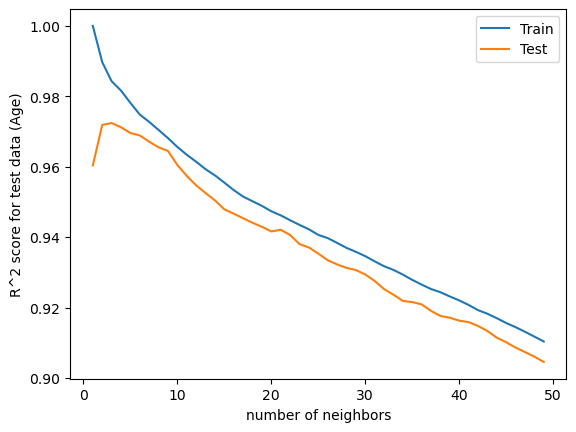

In [8]:
#Finding the best n_neighbors for KNN for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [9]:
#Training KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ", knn.score(X_train, y_train),"\n")
print("Test Score: ", knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9842882044740907 

Test Score:  0.9724207903540447 

r2 mean cross validate score: 0.968390769603652 

neg_mean_squared_error mean cross validate score: -0.016447259353576864 

neg_root_mean_squared_error mean cross validate score: -0.1279022989682964 

neg_mean_absolute_error mean cross validate score: -0.09211693453101126 



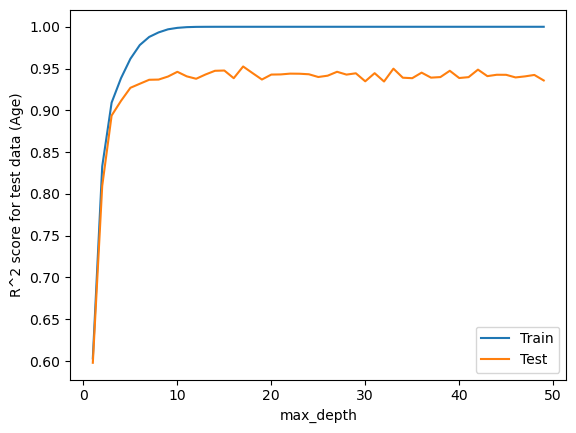

In [10]:
#Finding the best max_depth for DT for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    dt = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(dt.score(X_train, y_train))
    values2.append(dt.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [11]:
#Training Decision Tree model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train),"\n")
print("Test Score: ", dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(max_depth=11)
cv_scores = cross_validate(dt, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9995618962510272 

Test Score:  0.9394826204861281 

r2 mean cross validate score: 0.9465310811977019 

neg_mean_squared_error mean cross validate score: -0.027454597066926916 

neg_root_mean_squared_error mean cross validate score: -0.16494201333723918 

neg_mean_absolute_error mean cross validate score: -0.11345074839313056 



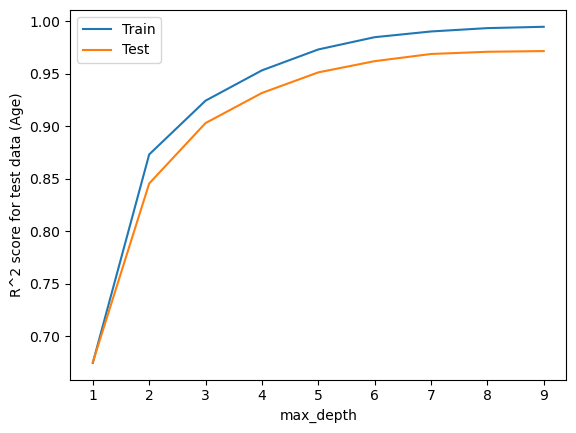

In [12]:
#Finding the best max_depth for RF for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values ,test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,10):
    rf = RandomForestRegressor(max_depth=n).fit(X_train, y_train)
    values1.append(rf.score(X_train, y_train))
    values2.append(rf.score(X_test, y_test))

plt.plot(range(1,10), values1, label='Train')
plt.plot(range(1,10), values2, label='Test')
plt.xlabel("max_depth")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [13]:
#Training Random Forest model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train),"\n")
print("Test Score: ", rf.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42, max_depth=10)
cv_scores = cross_validate(rf, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9953107613966578 

Test Score:  0.9722160757328454 

r2 mean cross validate score: 0.9717134176118337 

neg_mean_squared_error mean cross validate score: -0.014644534315130738 

neg_root_mean_squared_error mean cross validate score: -0.12088032251260805 

neg_mean_absolute_error mean cross validate score: -0.08007599023635582 

